# Análise dos Pagamentos do Bolsa Família no estado de Alagoas – 2023

## 1. Definição do Problema de Negócio

### 1.1. Contexto

O Programa Bolsa Família (PBF) é uma das principais políticas públicas de transferência de renda no Brasil, fundamental para o combate à pobreza e à desigualdade social. A análise de seus dados é crucial para que gestores públicos, pesquisadores e a sociedade civil compreendam a distribuição de recursos e o impacto socioeconômico em regiões específicas.

O estado de Alagoas (AL) é historicamente um dos que mais se beneficia do programa, devido aos seus indicadores socioeconômicos. Este projeto utiliza dados públicos de pagamentos do PBF referentes ao ano de 2023, extraídos do Portal da Transparência/Base dos Dados, focando exclusivamente no estado de Alagoas para um estudo de caso detalhado.

### 1.2. Problema de Negócio

O desafio reside em transformar um grande volume de dados transacionais do programa em *insights* acionáveis para gestores públicos ou analistas sociais. Especificamente, busca-se responder a questões críticas sobre a eficiência e a equidade da distribuição dos recursos:

- **Concentração de Recursos:** A distribuição dos valores pagos segue um padrão de concentração (como a Regra de Pareto), onde uma pequena parcela de municípios recebe a maior parte dos recursos?
- **Distribuição de Valores:** Qual é o perfil estatístico dos valores das parcelas pagas? Existem valores atípicos (outliers) que merecem investigação?

A resposta a essas perguntas é vital para validar se os recursos estão sendo direcionados de forma eficaz, seja para os maiores centros populacionais ou para áreas de maior vulnerabilidade, e para embasar futuras políticas de distribuição.

### 1.3. Objetivos do Projeto

O objetivo principal deste projeto é realizar uma Análise Exploratória de Dados (EDA) para mapear a distribuição dos pagamentos do Bolsa Família em Alagoas no ano de 2023.

Os objetivos específicos são:

- **Identificação de Concentração:** Determinar quais municípios concentram a maior parte dos recursos transferidos, calculando o percentual acumulado de pagamentos.
- **Análise Estatística:** Analisar a distribuição estatística dos valores das parcelas pagas, identificando média, mediana, desvio padrão e a presença de valores discrepantes (outliers).
- **Verificação de Pareto:** Aplicar a lógica da Regra de Pareto (80/20) para verificar a concentração de recursos em um subconjunto de municípios.

### 1.4. Critérios de Sucesso

O projeto será considerado um sucesso ao entregar:

- Um *dataset* limpo e pré-processado, pronto para análises mais aprofundadas.
- Uma tabela de classificação dos municípios por valor total recebido, com cálculo de percentual acumulado.
- Um *insight* claro sobre a concentração de recursos, quantificando quantos municípios concentram 80% do total pago.
- Visualizações que ilustrem a distribuição dos valores das parcelas e a concentração municipal.

## 2. Importação das Bibliotecas e Configuração

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Carregamento e Visão Inicial dos Dados
Análise das primeiras e últimas linhas para entender a estrutura do dataset.

In [4]:
df_bolsa_familia = pd.read_csv('bolsa_familia_2023_completo.csv')

In [5]:
df_bolsa_familia.head()

,ano_competencia,mes_competencia,municipio,sigla_uf,valor_parcela
0,2023,9,Campo Alegre,AL,25.0
1,2023,9,Campo Alegre,AL,25.0
2,2023,9,Maceió,AL,25.0
3,2023,9,Maceió,AL,25.0
4,2023,9,Maceió,AL,25.0


In [6]:
df_bolsa_familia.tail()

,ano_competencia,mes_competencia,municipio,sigla_uf,valor_parcela
99995,2023,9,Pilar,AL,600.0
99996,2023,9,Pilar,AL,600.0
99997,2023,9,Pilar,AL,600.0
99998,2023,9,Pilar,AL,600.0
99999,2023,9,Pilar,AL,600.0


## 4. Análise Exploratória de Dados (EDA)

Antes de fazer qualquer modificação vamos inspecionar o DataFrame para entender sua estrutura e identificar os problemas.



In [7]:
# Verificando as informações gerais do DataFrame
print("\n--- Informações Gerais do DataFrame (df_bolsa_familia.info()) ---\n")
df_bolsa_familia.info()


--- Informações Gerais do DataFrame (df_bolsa_familia.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano_competencia  100000 non-null  int64  
 1   mes_competencia  100000 non-null  int64  
 2   municipio        100000 non-null  object 
 3   sigla_uf         100000 non-null  object 
 4   valor_parcela    100000 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [8]:
print("\n--- Verificando valores ausentes ---\n")
print(df_bolsa_familia.isna().sum())


--- Verificando valores ausentes ---

ano_competencia    0
mes_competencia    0
municipio          0
sigla_uf           0
valor_parcela      0
dtype: int64


In [9]:
print("\n --- Verificando registros duplicados --- \n")
print(f"Número de linhas duplicadas: {df_bolsa_familia.duplicated().sum()}")


 --- Verificando registros duplicados --- 

Número de linhas duplicadas: 95739


In [10]:
print("\n--- Estatísticas descritivas para colunas numéricas ---\n")
print(df_bolsa_familia.describe())


--- Estatísticas descritivas para colunas numéricas ---

       ano_competencia  mes_competencia  valor_parcela
count         100000.0         100000.0  100000.000000
mean            2023.0              9.0     523.394640
std                0.0              0.0     110.870551
min             2023.0              9.0      25.000000
25%             2023.0              9.0     440.000000
50%             2023.0              9.0     600.000000
75%             2023.0              9.0     600.000000
max             2023.0              9.0     600.000000


In [11]:
print("\n--- Estatísticas descritivas para colunas categóricas ---\n")
print(df_bolsa_familia.describe(include = [object]))


--- Estatísticas descritivas para colunas categóricas ---

       municipio sigla_uf
count     100000   100000
unique       102        1
top       Maceió       AL
freq       23588   100000


In [12]:
# Verificando as informações gerais do DataFrame
print("\n--- Tipos de dados ---\n")
df_bolsa_familia.dtypes


--- Tipos de dados ---



,0
ano_competencia,int64
mes_competencia,int64
municipio,object
sigla_uf,object
valor_parcela,float64


## 5. Limpeza e Pré-Processamento de Dados

Agora, vamos resolver sistematicamente os problemas identificados na etapa de inspeção.

In [13]:
# df_bf será usado como DataFrame principal
df_bf = df_bolsa_familia.copy()

In [14]:
# Aqui criei uma coluna de 'Data' combinando ano e mês
df_bf ['data'] = pd.to_datetime(
    df_bf['ano_competencia'].astype(str) + '-' +
    df_bf['mes_competencia'].astype(str) + '-01'
)

In [15]:
df_bf.head()

,ano_competencia,mes_competencia,municipio,sigla_uf,valor_parcela,data
0,2023,9,Campo Alegre,AL,25.0,2023-09-01
1,2023,9,Campo Alegre,AL,25.0,2023-09-01
2,2023,9,Maceió,AL,25.0,2023-09-01
3,2023,9,Maceió,AL,25.0,2023-09-01
4,2023,9,Maceió,AL,25.0,2023-09-01


In [16]:
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ano_competencia  100000 non-null  int64         
 1   mes_competencia  100000 non-null  int64         
 2   municipio        100000 non-null  object        
 3   sigla_uf         100000 non-null  object        
 4   valor_parcela    100000 non-null  float64       
 5   data             100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


## 6. Tratamento de Outliers

Foi adotado o critério de 3 desvios padrão acima da média para identificar valores extremamente elevados, que poderiam distorcer a análise da distribuição dos pagamentos.


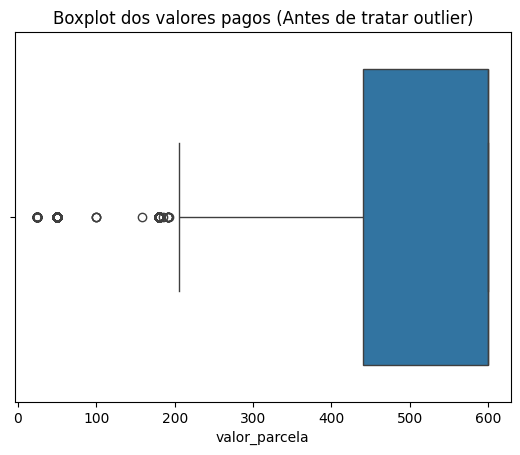

In [17]:
sns.boxplot(x = df_bf['valor_parcela'])
plt.title('Boxplot dos valores pagos (Antes de tratar outlier)')
plt.show()

In [18]:
# Vamos remover valores de 'Quantidade' que estão muito distantes da média.
# Uma abordagem comum é remover valores que estão além de 3 desvios padrão da média.
limite_superior = df_bf['valor_parcela'].mean() + 3 * df_bf['valor_parcela'].std()
df_bf = df_bf[df_bf['valor_parcela'] < limite_superior]

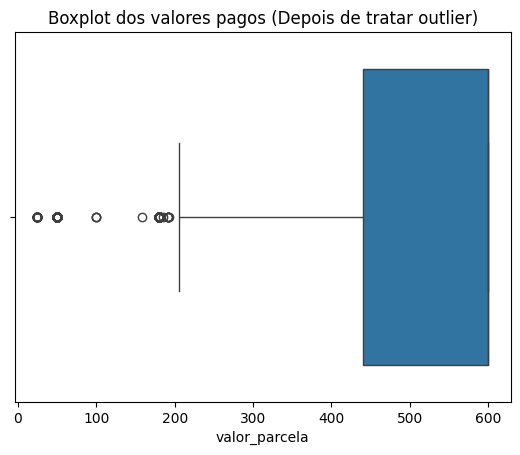

In [19]:
# Verificando o resultado
sns.boxplot(x = df_bf['valor_parcela'])
plt.title('Boxplot dos valores pagos (Depois de tratar outlier)')
plt.show()

Após a remoção dos valores extremos, observa-se uma distribuição mais concentrada, facilitando a análise do comportamento típico dos pagamentos.


## 7. Extração de Insights

Com os dados limpos, podemos começar a fazer perguntas e extrair insights.

In [20]:
df_bf.head()

,ano_competencia,mes_competencia,municipio,sigla_uf,valor_parcela,data
0,2023,9,Campo Alegre,AL,25.0,2023-09-01
1,2023,9,Campo Alegre,AL,25.0,2023-09-01
2,2023,9,Maceió,AL,25.0,2023-09-01
3,2023,9,Maceió,AL,25.0,2023-09-01
4,2023,9,Maceió,AL,25.0,2023-09-01


In [21]:
# valor total pago
total_pago = df_bf['valor_parcela'].sum()
print(f"Foi pago no total o valor de: {total_pago:,.2f}")

Foi pago no total o valor de: 52,339,464.00


In [22]:
# Valor médio, mínimo, e máximo das parcelas
valor_medio_parcelas = df_bf['valor_parcela'].mean()
valor_min_parcelas = df_bf['valor_parcela'].min()
valor_max_parcelas = df_bf['valor_parcela'].max()

print(f"O valor médio da parcela foi de: {valor_medio_parcelas:.2f}")
print(f"O valor mínimo da parcela foi de: {valor_min_parcelas}")
print(f"O valor máximo da parcela foi de: {valor_max_parcelas}")

O valor médio da parcela foi de: 523.39
O valor mínimo da parcela foi de: 25.0
O valor máximo da parcela foi de: 600.0


## Municípios que concentram mais recursos
Nesta etapa, agregamos o valor total recebido por município para identificar concentração dos repasses.


In [23]:
# Quais os municipios receberam mais recursos

recursos_por_municipio = df_bf.groupby('municipio')['valor_parcela'].sum().sort_values(ascending= False)
print(f"Os municipios que receberam mais recursos foram: {recursos_por_municipio}")

Os municipios que receberam mais recursos foram: municipio
Maceió                 12591560.0
Arapiraca               2908227.0
Palmeira dos Índios     2050739.0
Penedo                  1978928.0
Delmiro Gouveia         1052109.0
                          ...    
Porto de Pedras           49078.0
Santana do Mundaú         41635.0
Tanque d'Arca             33272.0
São Brás                  28580.0
Pindoba                   20381.0
Name: valor_parcela, Length: 102, dtype: float64


In [24]:
# Participação percentual por cada município
percentual_por_municipio = (recursos_por_municipio / total_pago) * 100

# Ordenar do maior para o menor
percentual_por_municipio = percentual_por_municipio.sort_values(ascending = False)

# Resultado final
print("\n--- Participação percentual de cada município: ---\n")
print(percentual_por_municipio.round(2))


--- Participação percentual de cada município: ---

municipio
Maceió                 24.06
Arapiraca               5.56
Palmeira dos Índios     3.92
Penedo                  3.78
Delmiro Gouveia         2.01
                       ...  
Porto de Pedras         0.09
Santana do Mundaú       0.08
Tanque d'Arca           0.06
São Brás                0.05
Pindoba                 0.04
Name: valor_parcela, Length: 102, dtype: float64


In [25]:
soma_percent = percentual_por_municipio.sum()
print(soma_percent)

100.00000000000001


In [26]:
# Selecionando o Top 5 municípios
top_5_municipios = percentual_por_municipio.head(5)

# Participação dos 5 municipios em relação ao total
participacao_top_5 = top_5_municipios.sum()

# Diferença do restante de municipios
restante = 100 - participacao_top_5

# imprimimos o resultado
print(f"Os 5 municípios que mais receberam recursos, representam um total de: {participacao_top_5:.2f}%")
print(f" O restante dos municípios representam um total de: {restante:.2f}%")

Os 5 municípios que mais receberam recursos, representam um total de: 39.32%
 O restante dos municípios representam um total de: 60.68%


In [27]:
# Evolução de pagamentos mês a mês
evolucao_mensal = df_bf.groupby(['ano_competencia', 'mes_competencia'])['valor_parcela'].sum()
print(evolucao_mensal)

ano_competencia  mes_competencia
2023             9                  52339464.0
Name: valor_parcela, dtype: float64


## Limitação dos dados temporais
Não é possível realizar uma análise de evolução mensal, pois os dados disponíveis referem-se apenas ao mês 09/2023.


In [28]:
# Distribuição dos valores pagos

df_bf['valor_parcela'].describe()

,valor_parcela
count,100000.000000
mean,523.394640
std,110.870551
min,25.000000
25%,440.000000
50%,600.000000
75%,600.000000
max,600.000000


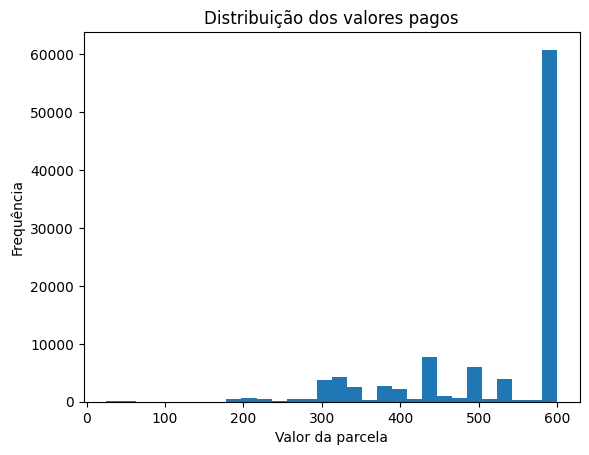

In [29]:
# Visualizar a distribuição

plt.hist(df_bf['valor_parcela'], bins = 30)
plt.title('Distribuição dos valores pagos')
plt.xlabel('Valor da parcela')
plt.ylabel('Frequência')
plt.show()

In [30]:
# Calcular percentual acumulado
percentual_acumulado = percentual_por_municipio.cumsum()
print(percentual_acumulado)

municipio
Maceió                  24.057487
Arapiraca               29.613958
Palmeira dos Índios     33.532109
Penedo                  37.313057
Delmiro Gouveia         39.323221
                          ...    
Porto de Pedras         99.763337
Santana do Mundaú       99.842885
Tanque d'Arca           99.906455
São Brás                99.961060
Pindoba                100.000000
Name: valor_parcela, Length: 102, dtype: float64


In [31]:
# Cria um dataframe final para analise de concentração
analise_concentracao = pd.DataFrame({
    'total_recebido': recursos_por_municipio,
    'percentual': percentual_por_municipio.round(2),
    'percentual_acumulado': percentual_acumulado.round(2)
})

# Visualizar os primeiros municipios
analise_concentracao.head(10)

,total_recebido,percentual,percentual_acumulado
municipio,,,
Maceió,12591560.0,24.06,24.06
Arapiraca,2908227.0,5.56,29.61
Palmeira dos Índios,2050739.0,3.92,33.53
Penedo,1978928.0,3.78,37.31
Delmiro Gouveia,1052109.0,2.01,39.32
Marechal Deodoro,1021507.0,1.95,41.27
Boca da Mata,851295.0,1.63,42.90
Atalaia,845144.0,1.61,44.52
Coruripe,841502.0,1.61,46.12


  ## 6. Análise de Concentração (Regra de Pareto)

In [32]:
# Descobrir quantos municipios concentram x% do total
limite = 80

municipios_ate_80 = analise_concentracao[
    analise_concentracao['percentual_acumulado'] <= limite
]

quantidade_municipios = len(municipios_ate_80)
total_municipios = analise_concentracao.shape[0]

print(f"{quantidade_municipios} municípios concentram aproximadamente {limite}% dos recursos.")
print(f"Isso representa {(quantidade_municipios / total_municipios) * 100:.2f}% do total de municípios.")


43 municípios concentram aproximadamente 80% dos recursos.
Isso representa 42.16% do total de municípios.


## 7. Conclusão e Próximos Passos

### 7.1. Conclusões da Análise

A análise exploratória dos dados do Bolsa Família em Alagoas (setembro/2023) revelou padrões importantes de distribuição e concentração de recursos:

- **Concentração Municipal:** Observa-se uma forte concentração de recursos nos maiores centros urbanos. Maceió, a capital, sozinha, concentra **24.06%** do valor total pago.
- **Verificação de Pareto:** A concentração é significativa, mas não segue o padrão clássico 80/20. Para atingir **80%** do valor total pago, são necessários **43 municípios**, o que representa **42.16%** do total de municípios de Alagoas.
- **Distribuição de Valores:** A distribuição dos valores das parcelas é assimétrica à direita, com a maioria dos pagamentos concentrada no valor máximo de R$ 600,00.

# Fim